In [ ]:
!pip install "ultralytics<=8.3.40"

In [ ]:
from ultralytics import YOLO

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [ ]:
!pip install roboflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.5/81.5 kB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 9.6 MB/s eta 0:00:00
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.11.0.86
    Uninstalling opencv-python-headless-4.11.0.86:
      Successfully uninstalled opencv-python-headless-4.11.0.86
  Attempting uninstall: idna
    Found existing installation: idna 3.10
    Uninstalling idna-3.10:
      Successfully uninstalled idna-3.10


In [ ]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="CesrykhC0PlcBWGu16lc")
project = rf.workspace("mohamed-traore-2ekkp").project("face-detection-mik1i")
version = project.version(24)
dataset = version.download("yolov8")


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.5/81.5 kB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 5.4 MB/s eta 0:00:00
  Attempting uninstall: idna
    Found existing installation: idna 3.10
    Uninstalling idna-3.10:
      Successfully uninstalled idna-3.10
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Face-Detection-24 in yolov8:: 100%|██████████| 7643/7643 [00:01<00:00, 5480.03it/s]


In [ ]:
from roboflow import Roboflow
import yaml
import os

rf = Roboflow(api_key="xxxxx")
project = rf.workspace("mohamed-traore-2ekkp").project("face-detection-mik1i")
version = project.version(24)
dataset = version.download("yolov8")

model_path="yolov8s.pt"
data_config_path=f"{dataset.location}/data.yaml"
epochs=20
image_size=640
batch_size=16

# Load the data.yaml file
with open(data_config_path, 'r') as f:
    data_yaml = yaml.safe_load(f)

# Update the paths to the train and val folders
data_yaml['train'] = os.path.join(dataset.location, 'train', 'images')
# Roboflow puts the test set into a test folder and uses that as the validation set.
data_yaml['val'] = os.path.join(dataset.location, 'test', 'images')


# Save the modified data.yaml back to the same path
with open(data_config_path, 'w') as f:
    yaml.dump(data_yaml, f)



model=YOLO(model_path)
results=model.train(
    data=data_config_path,
    epochs=epochs,
    imgsz=image_size,
    batch=batch_size)
results=model.val()
# Access metrics directly from the results object's results_dict attribute
print(results.results_dict)
# print(f"mAP50: {results.results_dict['metrics/mAP50']:.4f}")
# print(f"mAP50-95: {results.results_dict['metrics/mAP50-95']:.4f}")

loading Roboflow workspace...
loading Roboflow project...
New https://pypi.org/project/ultralytics/8.3.53 available 😃 Update with 'pip install -U ultralytics'
Ultralytics 8.3.40 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/content/Face-Detection-24/data.yaml, epochs=20, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train4, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, c

train: Scanning /content/Face-Detection-24/train/labels.cache... 3672 images, 684 backgrounds, 0 corrupt: 100%|██████████| 3672/3672 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))



val: Scanning /content/Face-Detection-24/test/labels.cache... 145 images, 26 backgrounds, 0 corrupt: 100%|██████████| 145/145 [00:00<?, ?it/s]


Plotting labels to runs/detect/train4/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train4
Starting training for 20 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/20      4.68G      1.621      1.863      1.608         22        640: 100%|██████████| 230/230 [01:23<00:00,  2.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.71it/s]

                   all        145        238      0.582      0.643       0.62      0.319



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/20       4.4G      1.664      1.493      1.619         24        640: 100%|██████████| 230/230 [01:19<00:00,  2.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.32it/s]

                   all        145        238      0.573       0.58      0.595      0.272



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/20      4.54G      1.656      1.475       1.61         16        640: 100%|██████████| 230/230 [01:23<00:00,  2.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.75it/s]

                   all        145        238      0.745      0.668      0.761      0.364



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/20      4.57G      1.616      1.418      1.591         25        640: 100%|██████████| 230/230 [01:19<00:00,  2.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.37it/s]

                   all        145        238      0.851      0.807      0.883      0.477



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/20      4.51G      1.539      1.306       1.52         19        640: 100%|██████████| 230/230 [01:21<00:00,  2.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.55it/s]

                   all        145        238      0.816      0.803       0.86      0.489



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/20      4.36G      1.485      1.229      1.489         15        640: 100%|██████████| 230/230 [01:19<00:00,  2.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.89it/s]

                   all        145        238      0.904      0.829      0.897      0.516



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/20      4.46G      1.421      1.144       1.45         12        640: 100%|██████████| 230/230 [01:19<00:00,  2.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.97it/s]

                   all        145        238      0.897      0.828      0.912      0.526



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/20      4.75G      1.397      1.106      1.426         20        640: 100%|██████████| 230/230 [01:19<00:00,  2.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.09it/s]

                   all        145        238      0.825      0.873      0.887      0.523



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/20       4.3G      1.347      1.037      1.401         24        640: 100%|██████████| 230/230 [01:21<00:00,  2.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.72it/s]

                   all        145        238      0.931      0.849      0.939      0.569



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/20      4.32G       1.32     0.9975      1.361         10        640: 100%|██████████| 230/230 [01:20<00:00,  2.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.92it/s]

                   all        145        238      0.908      0.824      0.913      0.551


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/20      4.55G      1.273      0.858      1.375          6        640: 100%|██████████| 230/230 [01:20<00:00,  2.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.50it/s]

                   all        145        238      0.824      0.895      0.905       0.58



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/20      4.94G      1.206     0.8192      1.323         23        640: 100%|██████████| 230/230 [01:16<00:00,  3.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.18it/s]

                   all        145        238      0.884      0.834      0.902      0.575



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/20      4.72G      1.173     0.7671      1.304          7        640: 100%|██████████| 230/230 [01:17<00:00,  2.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.70it/s]

                   all        145        238      0.895      0.894      0.936      0.606



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/20      4.57G      1.161     0.7588      1.288         14        640: 100%|██████████| 230/230 [01:18<00:00,  2.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.92it/s]

                   all        145        238      0.899      0.895      0.935      0.609



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/20      4.54G      1.132     0.7148      1.272         16        640: 100%|██████████| 230/230 [01:17<00:00,  2.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.90it/s]


                   all        145        238      0.925      0.861      0.945      0.608

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/20      4.32G      1.084     0.6829      1.244          6        640: 100%|██████████| 230/230 [01:18<00:00,  2.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.06it/s]

                   all        145        238      0.904      0.891       0.95      0.631



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/20      4.31G      1.046     0.6418      1.216         10        640: 100%|██████████| 230/230 [01:17<00:00,  2.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.79it/s]


                   all        145        238      0.955      0.894      0.954      0.638

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/20      4.78G       1.01     0.6153       1.19         11        640: 100%|██████████| 230/230 [01:16<00:00,  3.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.77it/s]

                   all        145        238      0.927      0.874      0.944      0.637



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/20      4.38G     0.9628     0.5782      1.156         11        640: 100%|██████████| 230/230 [01:16<00:00,  3.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.66it/s]

                   all        145        238      0.944      0.915      0.959      0.649



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/20       4.8G     0.9387     0.5523      1.133         11        640: 100%|██████████| 230/230 [01:16<00:00,  3.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.09it/s]

                   all        145        238       0.96      0.897       0.96      0.653



20 epochs completed in 0.458 hours.
Optimizer stripped from runs/detect/train4/weights/last.pt, 22.5MB
Optimizer stripped from runs/detect/train4/weights/best.pt, 22.5MB

Validating runs/detect/train4/weights/best.pt...
Ultralytics 8.3.40 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11,125,971 parameters, 0 gradients, 28.4 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  1.72it/s]


                   all        145        238       0.96      0.899       0.96      0.653
Speed: 0.3ms preprocess, 4.5ms inference, 0.0ms loss, 4.6ms postprocess per image
Results saved to runs/detect/train4
Ultralytics 8.3.40 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11,125,971 parameters, 0 gradients, 28.4 GFLOPs


val: Scanning /content/Face-Detection-24/test/labels.cache... 145 images, 26 backgrounds, 0 corrupt: 100%|██████████| 145/145 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:03<00:00,  2.73it/s]


                   all        145        238       0.96      0.898       0.96      0.654
Speed: 0.3ms preprocess, 9.6ms inference, 0.0ms loss, 4.5ms postprocess per image
Results saved to runs/detect/train42
{'metrics/precision(B)': 0.9595808652579335, 'metrics/recall(B)': 0.8977639194487651, 'metrics/mAP50(B)': 0.9599313950412519, 'metrics/mAP50-95(B)': 0.6542137720153178, 'fitness': 0.6847855343179112}


In [ ]:
model

YOLO(
  (model): DetectionModel(
    (model): Sequential(
      (0): Conv(
        (conv): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
        (act): SiLU(inplace=True)
      )
      (1): Conv(
        (conv): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
        (act): SiLU(inplace=True)
      )
      (2): C2f(
        (cv1): Conv(
          (conv): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1))
          (act): SiLU(inplace=True)
        )
        (cv2): Conv(
          (conv): Conv2d(96, 64, kernel_size=(1, 1), stride=(1, 1))
          (act): SiLU(inplace=True)
        )
        (m): ModuleList(
          (0): Bottleneck(
            (cv1): Conv(
              (conv): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
              (act): SiLU(inplace=True)
            )
            (cv2): Conv(
              (conv): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
              (act): SiLU(inplace=True)
   

In [ ]:
print(results.results_dict)

{'metrics/precision(B)': 0.9595808652579335, 'metrics/recall(B)': 0.8977639194487651, 'metrics/mAP50(B)': 0.9599313950412519, 'metrics/mAP50-95(B)': 0.6542137720153178, 'fitness': 0.6847855343179112}


In [ ]:
import torch

In [ ]:
torch.save(model.state_dict() ,'yolo_modelv7.pt')

In [ ]:
import torch
from ultralytics import YOLO

# Assuming your model is already trained and called 'model'
#And that model is called model
model_path="/content/runs/detect/train/weights/best.pt"
model=YOLO(model_path)

# Save the entire model
torch.save(model, 'yolo_full_model.pt')

# Later you can load it with:
loaded_model = torch.load('yolo_full_model.pt')
#The model can now be used for inference like this:
results = loaded_model.predict(source='/content/prabhas.jpeg', conf=0.25)
for result in results:
  print(result.boxes)


image 1/1 /content/prabhas.jpeg: 480x640 2 faces, 49.6ms
Speed: 1.9ms preprocess, 49.6ms inference, 1.7ms postprocess per image at shape (1, 3, 480, 640)
ultralytics.engine.results.Boxes object with attributes:

cls: tensor([0., 0.], device='cuda:0')
conf: tensor([0.5880, 0.5109], device='cuda:0')
data: tensor([[ 39.7031,   0.5786, 116.8958, 132.0447,   0.5880,   0.0000],
        [ 43.0026,  12.9595,  99.9764, 131.3871,   0.5109,   0.0000]], device='cuda:0')
id: None
is_track: False
orig_shape: (148, 199)
shape: torch.Size([2, 6])
xywh: tensor([[ 78.2994,  66.3116,  77.1927, 131.4661],
        [ 71.4895,  72.1733,  56.9737, 118.4277]], device='cuda:0')
xywhn: tensor([[0.3935, 0.4481, 0.3879, 0.8883],
        [0.3592, 0.4877, 0.2863, 0.8002]], device='cuda:0')
xyxy: tensor([[ 39.7031,   0.5786, 116.8958, 132.0447],
        [ 43.0026,  12.9595,  99.9764, 131.3871]], device='cuda:0')
xyxyn: tensor([[0.1995, 0.0039, 0.5874, 0.8922],
        [0.2161, 0.0876, 0.5024, 0.8878]], device='cuda:

In [ ]:
import locale
locale.getpreferredencoding = lambda: "UTF-8"


image 1/1 /content/prabhas.jpeg: 480x640 1 face, 14.5ms
Speed: 2.4ms preprocess, 14.5ms inference, 2.1ms postprocess per image at shape (1, 3, 480, 640)


Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)


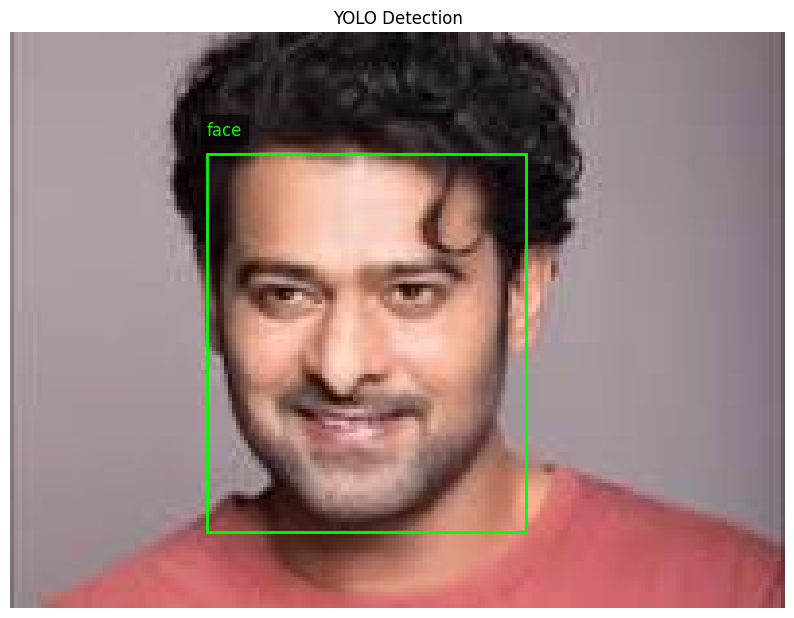


image 1/1 /content/disha_patani.jpeg: 640x640 1 face, 16.3ms
Speed: 2.9ms preprocess, 16.3ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


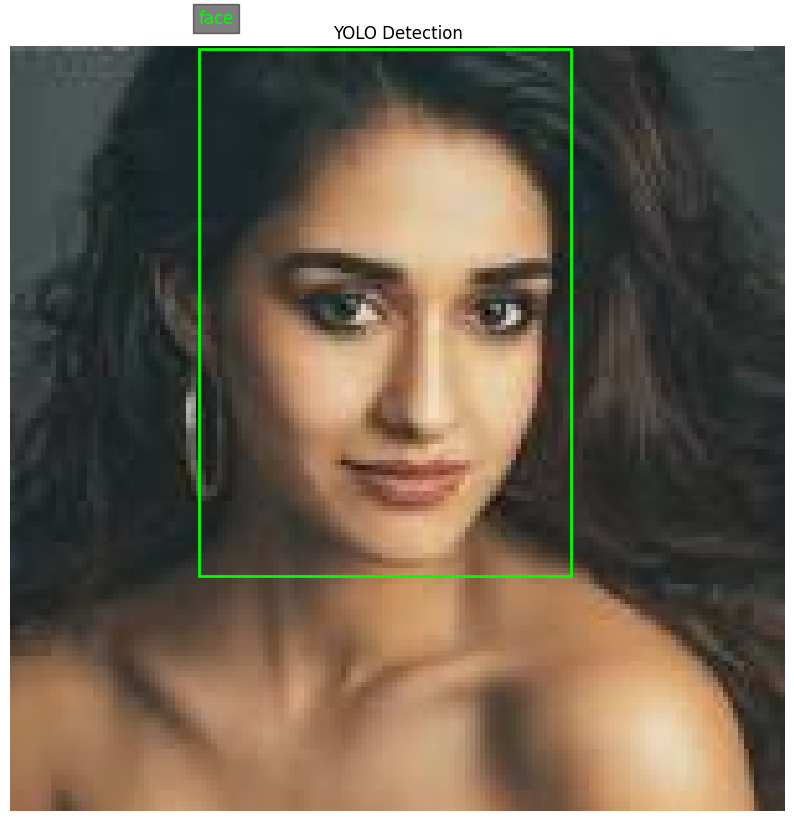


image 1/1 /content/group_image.jpg: 448x640 8 faces, 14.6ms
Speed: 2.8ms preprocess, 14.6ms inference, 1.9ms postprocess per image at shape (1, 3, 448, 640)


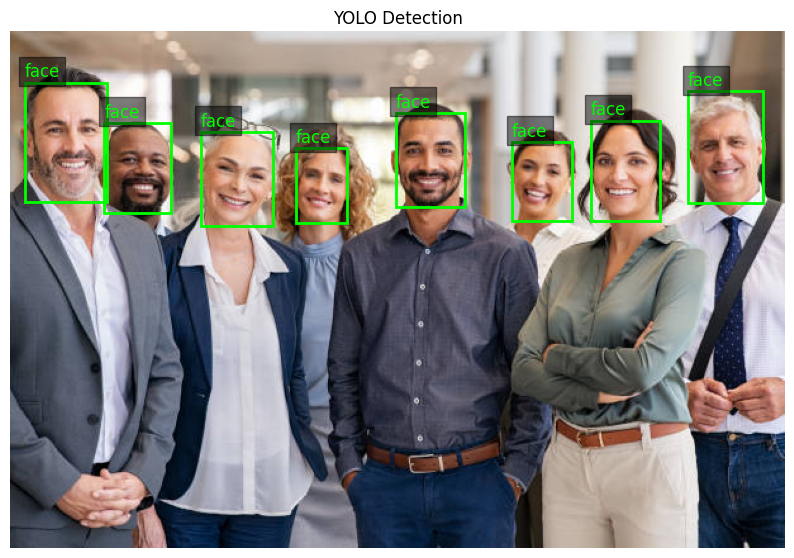

In [ ]:
import torch
from ultralytics import YOLO
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches

def display_yolo_predictions(image_path, model_path="/content/runs/detect/train4/weights/best.pt", conf=0.25):
    """
    Displays YOLO predictions on an image using Matplotlib.

    Args:
        image_path (str): Path to the input image.
        model_path (str, optional): Path to the YOLO model. Defaults to "/content/runs/detect/train/weights/best.pt".
        conf (float, optional): Confidence threshold for predictions. Defaults to 0.25.
    """
    # Load the trained model
    model = YOLO(model_path)

    # Perform prediction
    results = model.predict(source=image_path, conf=conf)

    # Get the image as a numpy array
    image_cv2 = cv2.imread(image_path)

    #Convert the image from BGR (OpenCV) to RGB (Matplotlib)
    image_rgb=cv2.cvtColor(image_cv2, cv2.COLOR_BGR2RGB)

    # Get class names
    class_names = model.names

    # Display the image using Matplotlib
    fig, ax = plt.subplots(1, figsize=(10, 10))
    ax.imshow(image_rgb)


    # Loop through each detection and draw the boxes
    for result in results:
        boxes = result.boxes.cpu().numpy() # Get the bounding box coordinates
        for box in boxes:
            b = box.xyxy[0].astype(int)  # Get the bounding box coordinates in int format
            c = int(box.cls)  # Class ID
            class_name = class_names[c] # Get class name from class ID using model.names


            # Create a Rectangle patch
            rect = patches.Rectangle((b[0], b[1]), b[2] - b[0], b[3] - b[1], linewidth=2, edgecolor='lime', facecolor='none')

            # Add the rectangle to the axes
            ax.add_patch(rect)

            # Add class label using the class_name instead of c
            ax.text(b[0], b[1] - 5, class_name, color='lime', fontsize=12, bbox=dict(facecolor='black', alpha=0.5))

    plt.title('YOLO Detection')
    plt.axis('off')  # Turn off axis numbers
    plt.show()


# Example usage:
display_yolo_predictions(image_path='/content/prabhas.jpeg')
display_yolo_predictions(image_path='/content/disha_patani.jpeg')
display_yolo_predictions(image_path='/content/group_image.jpg')

# You can also use a different model
# display_yolo_predictions(image_path='/content/prabhas.jpeg', model_path='yolov8n.pt')